In [7]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('Netflix Dataset.csv')

**Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records**

In [8]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [10]:
data[data.duplicated(inplace=True)]

TypeError: DataFrame.duplicated() got an unexpected keyword argument 'inplace'

**Is there any Null Value present in any column ? Show with Heat-map**

In [11]:
data.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


<Axes: >

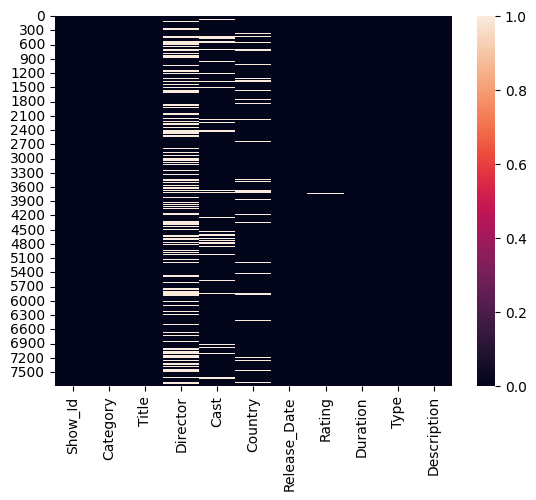

In [12]:
sns.heatmap(data.isnull())

**For 'House of Cards', what is the Show Id and Who is the Director of this show**

In [13]:
data[data['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


**In which year highest number of the TV Shows & Movies were released ? Show with Bar Graph**

In [14]:
data['Date_N'] = pd.to_datetime(data['Release_Date'], format = 'mixed')

In [15]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [16]:
data['Date_N'].dt.year.value_counts()

,count
Date_N,
2019.0,2154
2020.0,2010
2018.0,1685
2017.0,1225
2016.0,443
2021.0,117
2015.0,88
2014.0,25
2011.0,13


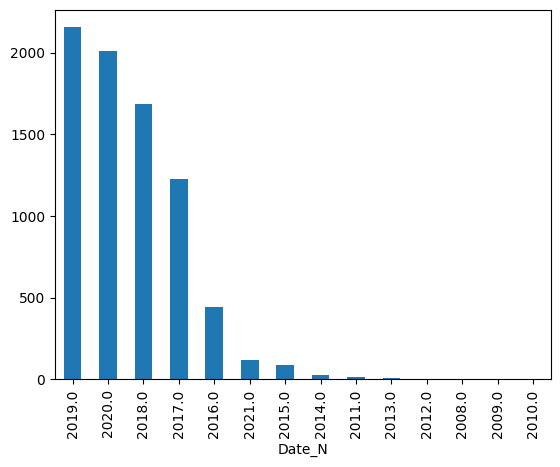

In [17]:
data['Date_N'].dt.year.value_counts().plot(kind='bar') ;

**How many Movies & TV Shows are in the dataset ? Show with Bar Graph**

In [18]:
data.groupby('Category').Category.count()

,Category
Category,
Movie,5379
TV Show,2410


<Axes: xlabel='count', ylabel='Category'>

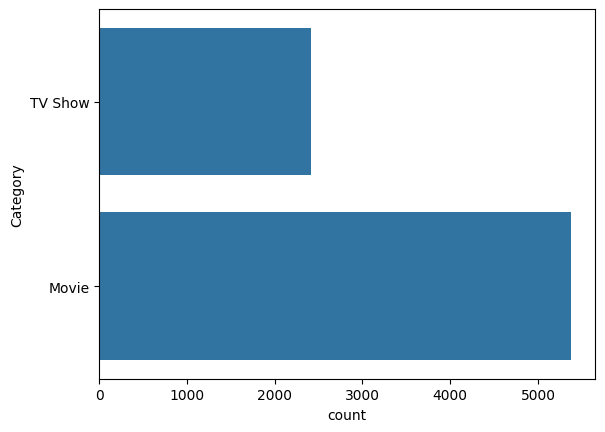

In [19]:
sns.countplot(data['Category'])        # To show the count of all unique values of any column in the form of bar graph

**Show all the Movies that were released in year 2000**


In [23]:
data[ (data['Category'] == 'Movie') & (data['year']==2020) ]

KeyError: 'year'

**Show only the Titles of all TV Shows that were released in India only.**

In [22]:
data[ (data['Category']=='TV Show') & (data['Country']=='India') ] ['Title']

,Title
86,21 Sarfarosh: Saragarhi 1897
132,7 (Seven)
340,Agent Raghav
364,Akbar Birbal
533,Anjaan: Rural Myths
...,...
6249,The Creative Indians
6400,The Golden Years with Javed Akhtar
6469,The House That Made Me
7294,Typewriter


**Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix**

In [24]:
data['Director'].value_counts().head(10)

,count
Director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,10
David Dhawan,9


**Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom**

In [27]:
data[ (data['Category']=='Movie') & (data['Type']=='Comedies') | (data['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31


**In how many movies/shows, Tom Cruise was cast ?**

In [30]:


data[data['Category'].isin(['Movies', 'shows']) & (data['Cast'] == 'Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N


**What are the different Ratings defined by Netflix ?**

In [31]:
data['Rating'].nunique()

14

In [35]:

data['Rating'].value_counts()

,count
Rating,
TV-MA,2865
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194


**How many Movies got the 'TV-14' rating, in Canada ?**

In [36]:
data[(data['Category']=='Movie') & (data['Rating']=='TV-14')].shape

(1272, 12)

In [37]:
data[(data['Category']=='TV Show') & (data['Rating']=='R')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
4497,s4498,TV Show,Nobel,NaN,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,"December 10, 2016",R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016-12-10
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25


**What is the maximum duration of a Movie/Show on Netflix ?**

In [60]:

data[data['Duration'] == data['Duration'].max()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020-09-08
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
42,s43,Movie,Çok Filim Hareketler Bunlar,Ozan Açıktan,"Ayça Erturan, Aydan Taş, Ayşegül Akdemir, Burc...",Turkey,"March 10, 2017",TV-MA,99 min,"Comedies, International Movies",Vignettes of the summer holidays follow vacati...,2017-03-10
121,s122,Movie,50 First Dates,Peter Segal,"Adam Sandler, Drew Barrymore, Rob Schneider, S...",United States,"December 1, 2020",PG-13,99 min,"Comedies, Romantic Movies",After falling for a pretty art teacher who has...,2020-12-01
147,s148,Movie,A Babysitter's Guide to Monster Hunting,Rachel Talalay,"Tamara Smart, Oona Laurence, Tom Felton, Troy ...",United States,"October 15, 2020",TV-PG,99 min,Children & Family Movies,"Recruited by a secret society of babysitters, ...",2020-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...
7449,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019-06-19
7527,s7526,Movie,Welcome Mr. President,Riccardo Milani,"Claudio Bisio, Kasia Smutniak, Beppe Fiorello,...",Italy,"October 1, 2016",TV-MA,99 min,"Comedies, International Movies",When frustrated politicians name a historical ...,2016-10-01
7559,s7558,Movie,What Keeps You Alive,Colin Minihan,"Hannah Emily Anderson, Brittany Allen, Martha ...",Canada,"August 1, 2020",R,99 min,"LGBTQ Movies, Thrillers",A couple's romantic anniversary retreat to a r...,2020-08-01
7638,s7637,Movie,Winter on Fire: Ukraine's Fight for Freedom,Evgeny Afineevsky,NaN,"United Kingdom, Ukraine, United States","October 9, 2015",TV-MA,99 min,"Documentaries, International Movies","Over 93 days in Ukraine, what started as peace...",2015-10-09


**Which individual country has the Highest No. of TV Shows ?**

In [57]:
data_tvshow = data[data['Category'] == 'TV Show']
data_tvshow['Country'].value_counts()

,count
Country,
United States,705
United Kingdom,204
Japan,157
South Korea,147
India,71
...,...
"United Kingdom, Ireland, United States",1
"United Kingdom, Spain",1
"Italy, United States",1
